First we import the required packages:

In [1]:
from pyDOE import *
from scipy.stats import norm
import matplotlib.pyplot as plt
import seaborn as sns
import areametric as am
import numpy as np

In /home/enmidol/.local/lib/python3.6/site-packages/matplotlib/mpl-data/stylelib/_classic_test.mplstyle: 
The text.latex.preview rcparam was deprecated in Matplotlib 3.3 and will be removed two minor releases later.
In /home/enmidol/.local/lib/python3.6/site-packages/matplotlib/mpl-data/stylelib/_classic_test.mplstyle: 
The mathtext.fallback_to_cm rcparam was deprecated in Matplotlib 3.3 and will be removed two minor releases later.
In /home/enmidol/.local/lib/python3.6/site-packages/matplotlib/mpl-data/stylelib/_classic_test.mplstyle: Support for setting the 'mathtext.fallback_to_cm' rcParam is deprecated since 3.3 and will be removed two minor releases later; use 'mathtext.fallback : 'cm' instead.
In /home/enmidol/.local/lib/python3.6/site-packages/matplotlib/mpl-data/stylelib/_classic_test.mplstyle: 
The validate_bool_maybe_none function was deprecated in Matplotlib 3.3 and will be removed two minor releases later.
In /home/enmidol/.local/lib/python3.6/site-packages/matplotlib/mpl-d

This is how pyDOE is used to perform LHS.
We also generate a bunch of points from a normal distribution that will be useful to compare with.

[[0.5    ]
 [0.25   ]
 [0.75   ]
 [0.125  ]
 [0.625  ]
 [0.375  ]
 [0.875  ]
 [0.0625 ]
 [0.5625 ]
 [0.3125 ]
 [0.8125 ]
 [0.1875 ]
 [0.6875 ]
 [0.4375 ]
 [0.9375 ]
 [0.03125]
 [0.53125]
 [0.28125]
 [0.78125]
 [0.15625]]
[0.5, 0.25, 0.75, 0.125, 0.625, 0.375, 0.875, 0.0625, 0.5625, 0.3125, 0.8125, 0.1875, 0.6875, 0.4375, 0.9375, 0.03125, 0.53125, 0.28125, 0.78125, 0.15625]
[ 0.         -0.67448975  0.67448975 -1.15034938  0.31863936 -0.31863936
  1.15034938 -1.53412054  0.15731068 -0.48877641  0.88714656 -0.88714656
  0.48877641 -0.15731068  1.53412054 -1.86273187  0.07841241 -0.57913216
  0.77642176 -1.00999017]


<AxesSubplot:ylabel='Proportion'>

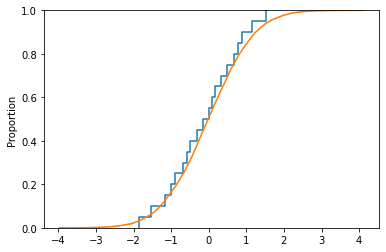

In [43]:
from statsmodels.tools.sequences import halton
x = halton(1,20)
z = []
y = norm
print(x)
for element in x:
    z.append(element[0])
print(z)
lhd = y.ppf(z)
import seaborn as sns
sns.ecdfplot(lhd)
print(lhd)

normality = norm.rvs(loc=0, scale=1, size=10000)
sns.ecdfplot(normality)

We now perform the comparison between the 5 samples from LHS and the 10000 samples from a Gaussian distribution.

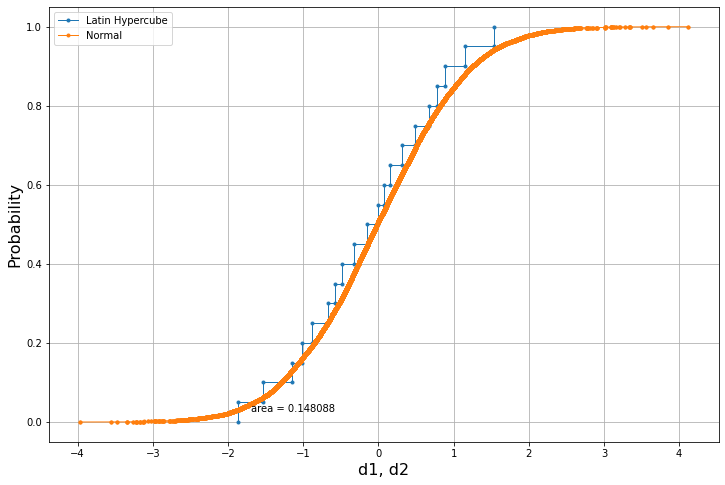

In [44]:
am.plot(list(lhd), list(normality))

In [5]:
print(np.mean(samples))
print(np.std(samples))

0.19553484950003386
0.8181802287935742


In [6]:
def comparator(number_of_samples, plot=0):
    lhd = lhs(1, samples=number_of_samples)
    lhd = norm(loc=0, scale=1).ppf(lhd)
    samples = []
    for element in lhd:
        samples.append(element[0])
    normality = norm.rvs(loc=0, scale=1, size=10000)
    
    if plot == 0:
        return am.areaMe(list(samples), list(normality))
    else:
        am.plot(list(samples), list(normality))

Text(0, 0.5, 'Area metric')

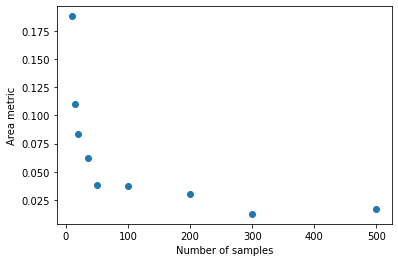

In [8]:
area10 = comparator(10)
area15 = comparator(15)
area20 = comparator(20)
area35 = comparator(35)
area50 = comparator(50)
area100 = comparator(100)
area200 = comparator(200)
area300 = comparator(300)
area500 = comparator(500)

plt.scatter([10,15,20,35,50,100,200,300,500],
            [area10, area15, area20, area35, area50, area100, area200, area300,area500])
plt.xlabel("Number of samples")
plt.ylabel("Area metric")

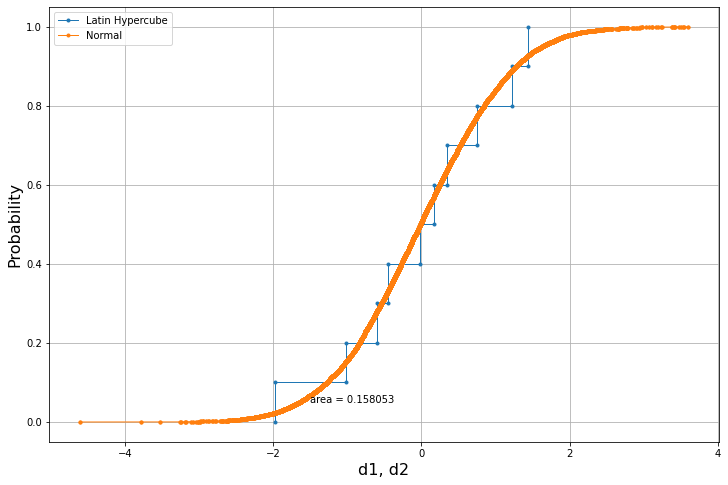

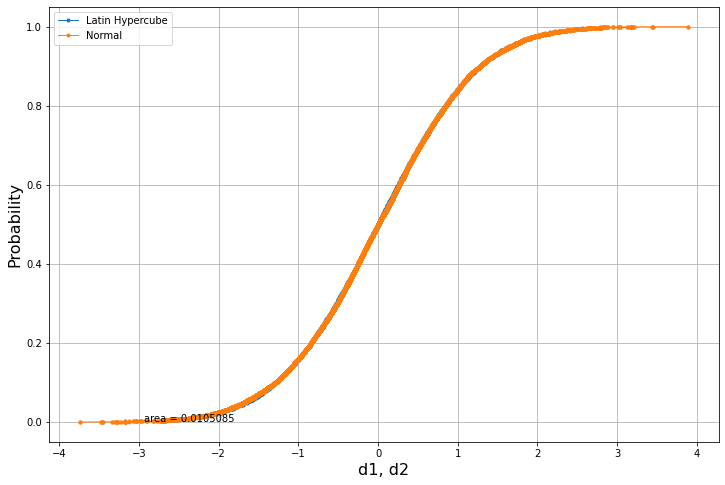

In [31]:
comparator(10, plot=1)
comparator(500,plot=1)